In [660]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp, odeint

##### Sistema de ecuaciones

$$
\frac{dy}{dt} = -k_{a}y,\hspace{5mm}k_{a} > 0
$$

$$
\frac{dx}{dt} = \frac{k_{a}}{V}y - k_{e}x, \hspace{5mm} k_{e} > 0
$$

Sistema resuelto

$$
\begin{equation}
    x\left(t\right) = \frac{k_a y_0}{V\left(k_a - k_e\right)}\left(e^{-k_e t} - e^{-k_a t}\right)
\end{equation}
$$
$$
\begin{equation}
    y_n\left(t\right) = y_0 \left(\frac{1 -\alpha^n}{1-\alpha}\right)e^{-k_a \left(t-\left(n-1\right)t_0\right)}
\end{equation}
$$

In [661]:
# Modelo basado en la farmacocinética de la amoxacilina según los datos de:

# http://www.facmed.unam.mx/bmnd/gi_2k8/prods/PRODS/15.HTM#:~:text=FARMACOCINÉTICA%20Y%20FARMACODINAMIA%3A&text=Se%20absorbe%20rápidamente%20después%20de,AMOXICILINA%20es%20de%2061.3%20minutos.
# https://cima.aemps.es/cima/dochtml/ft/62459/FT_6245#:~:text=De%20250%20mg%20a%20500,al%20día%2C%20durante%20un%20día.&text=500%20mg%20cada%208%20horas%2C%20de%20750%20mg,1%20g%20cada%2012%20horas.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC283758/#:~:text=The%20absorption%20rate%20constant%2C%20kappa,half-life%20was%200.72%20h.
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC283758/pdf/aac00382-0105.pdf
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC351932/pdf/aac00295-0140.pdf
# https://www.rxlist.com/amoxicillin-drug.htm#description

# FORMA FARMACÉUTICA Y FORMULACIÓN:

# Cada CÁPSULA contiene:

# Amoxicilina tetrahidratada
# equivalente a..............................250 y 500 mg
# de amoxicilina

# La administración de AMOXICILINA por vía oral en cápsulas con dosis de 250 y 500 mg, 
# alcanza un nivel sanguíneo máximo entre 1 y 2 horas después de la administración, en 
# un margen que va de 3.5 a 5.0 mcg/ml y de 5.5 a 7.5 mcg/ml, respectivamente.

# 1 microgramo/mililitro = 1 miligramo/litro

# Valores Iniciales
X0 = 0      # miligramo/L ; Es la dosis inicial del antibiótico en sangre
Y0 = 250    # miligramo ; Es la dosis inicial del antibiótico en estómago
Z0 = 10     # Densidad 

# Constantes
t0 = 8    # Horas
ka = 1.3    # horas^-1
ke = 1/8    # horas^-1
V = 5.5     # litros de sangre promedio según el rango de (3.5 - 6.0)
p = 0.005
α = np.exp(-ka*t0)

# El tratamiento de amoxacilina consta de una pastilla de 500mg cada 8 horas
# por lo tanto el número de dosis o "n_dosis" del tratamiento total va a 
# calcularse multiplicando 3 (dosis por día) por el número de días.
n = 4      # Número de días que va a tomar el tratamiento
n_dosis = 3 * n # Número de dosis totales para el tratamiento completo.



In [662]:
def model(c, t):
    y = c[0]
    x = c[1]
    dydt = -ka * y
    dxdt = ((ka / V) * y) - (ke * x)
    return np.array([dydt, dxdt])

step = 0.001
dosis_arr_2 = np.array([np.arange(i*t0, (i*t0) + t0, step) for i in range(n_dosis)])

t = np.arange(0, t0, step)
ysol = []
c0 = np.array([Y0, X0])

for i in range(len(dosis_arr_2)):
    ysol.append(odeint(model, c0, dosis_arr_2[i]))
    c0 = np.array([Y0 + ysol[-1][-1][0], X0 + ysol[-1][-1][1]])

t = np.concatenate(dosis_arr_2)
y = np.concatenate(ysol)[ : ,0]
x = np.concatenate(ysol)[ : ,1]

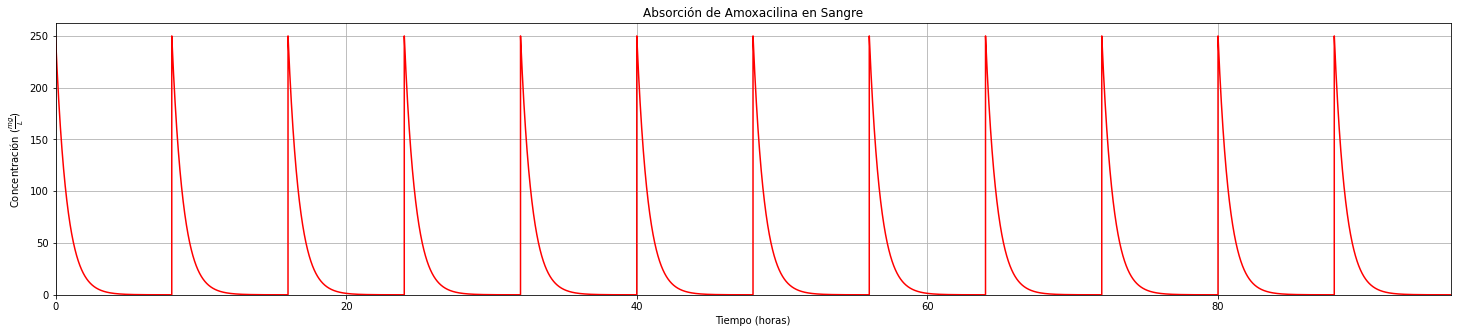

In [663]:
fig, ax = plt.subplots(figsize=(25,5))
plt.plot(t, y, 'r', label='Concentración en sangre de amoxicilina')
plt.xlim(0, t0*n_dosis)

plt.ylim(0)
plt.xlabel('Tiempo (horas)')
plt.ylabel(r'Concentración ($\frac{mg}{L}$)')

plt.title('Absorción de Amoxacilina en Sangre')
plt.grid(True)

Text(0.5, 1.0, 'Modelo Simulado de Absorción de \nAmoxacilina en Sangre')

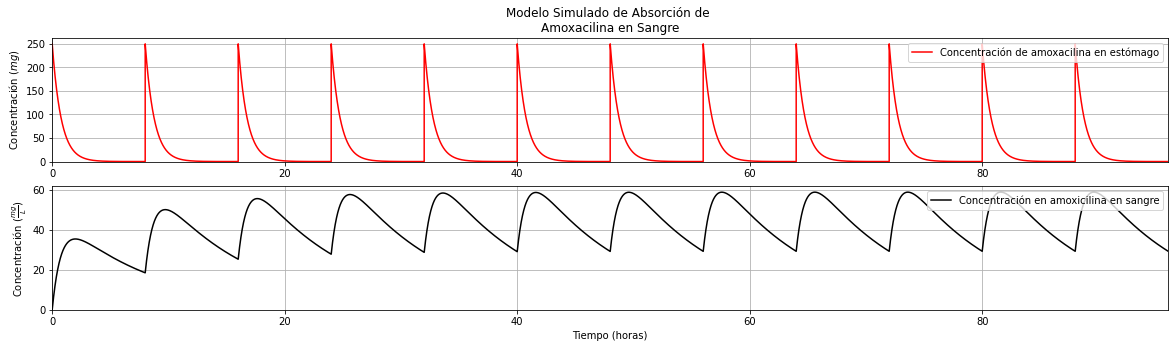

In [664]:
figure, axis = plt.subplots(2, 1, figsize=(20,5))
axis[0].plot(t, y, 'r', label='Concentración de amoxacilina en estómago')
axis[1].plot(t, x, 'k', label='Concentración en amoxicilina en sangre')

axis[0].grid(True)
axis[1].grid(True)

axis[0].set_xlim(0, t0*n_dosis)
axis[0].set_ylim(0)

axis[1].set_xlim(0, t0*n_dosis)
axis[1].set_ylim(0)

axis[1].set_xlabel('Tiempo (horas)')

axis[0].set_ylabel(r'Concentración $(mg)$')
axis[1].set_ylabel(r'Concentración $(\frac{mg}{L})$')

axis[0].legend(loc=1)
axis[1].legend(loc=1)

axis[0].set_title('Modelo Simulado de Absorción de \nAmoxacilina en Sangre')

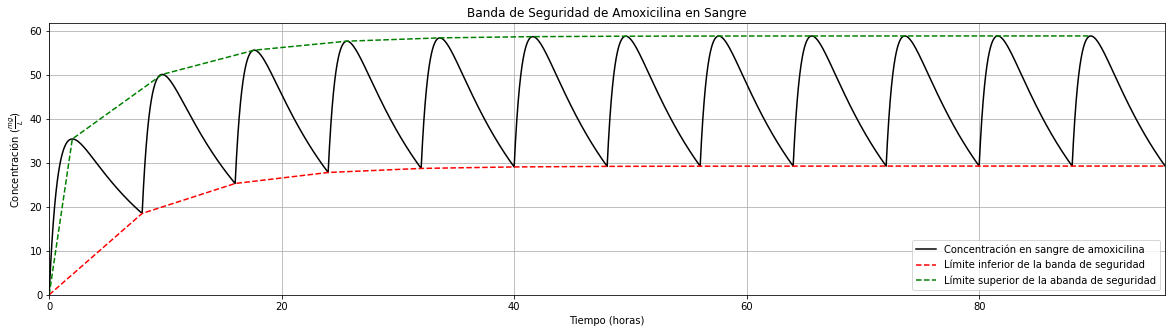

In [665]:
ll = np.concatenate([x[np.where(t == dosis_arr_2[i][-1] if i >= 0 else t == 0.)] for i in range(-1, len(dosis_arr_2))])
lt = np.concatenate([t[np.where(t == dosis_arr_2[i][-1] if i >= 0 else t == 0.)] for i in range(-1, len(dosis_arr_2))])

hl = np.append(np.array([np.max(x[len(dosis_arr_2) * i: (len(dosis_arr_2[i]) * i) + 1 ]) for i in range(0, len(dosis_arr_2))]), np.max(x[:-len(dosis_arr_2)]))
ht = np.concatenate([t[np.where(x == hl[i])] for i in range(len(hl))])
tt = np.mean([ht, lt], axis=0)

fig, ax = plt.subplots(figsize=(20,5))
plt.plot(t, x, 'k', label='Concentración en sangre de amoxicilina')
plt.plot(lt,ll, '--', color='red', label='Límite inferior de la banda de seguridad')
plt.plot(ht, hl, '--', color='green', label='Límite superior de la abanda de seguridad')
plt.xlim(0, t0*n_dosis)
plt.ylim(0)
plt.xlabel('Tiempo (horas)')
plt.ylabel(r'Concentración ($\frac{mg}{L}$)')
plt.title('Banda de Seguridad de Amoxicilina en Sangre')
plt.grid(True)
plt.legend(loc='best')

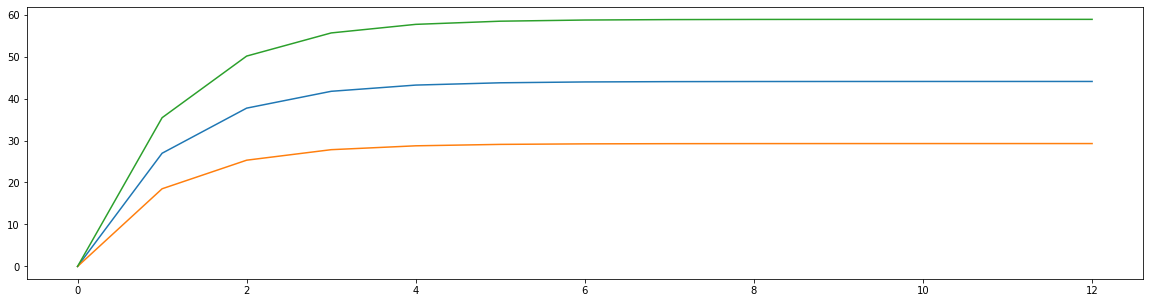

In [666]:
fig, ax = plt.subplots(figsize=(20,5))
safe_mean = np.mean([hl, ll], axis=0)
plt.plot(safe_mean)
plt.plot(ll)
plt.plot(hl)

In [667]:
ycsol = []
c0_c = np.array([Y0, X0, Z0])

def complex_model(c, t):
    y = c[0]
    x = c[1]
    z = c[2]
    dydt = -ka * y
    dxdt = ((ka / V) * y) - (ke * x)
    dzdt = p*z*(1 -z)-(α*x*z)
    return np.array([dydt, dxdt, dzdt])

for i in range(len(dosis_arr_2)):
    ycsol.append(odeint(complex_model, c0_c, dosis_arr_2[i]))
    # c0 = np.array([Y0 + ysol[-1][-1][0], X0 + ysol[-1][-1][1]])
    c0 = np.array([Y0 + ycsol[-1][-1][0], X0 + ycsol[-1][-1][1]], ycsol[-1][-1][2])

In [668]:
tz = np.concatenate(dosis_arr_2)
yz = np.concatenate(ycsol)[ : ,0]
xz = np.concatenate(ycsol)[ : ,1]
zz = np.concatenate(ycsol)[ : ,2]

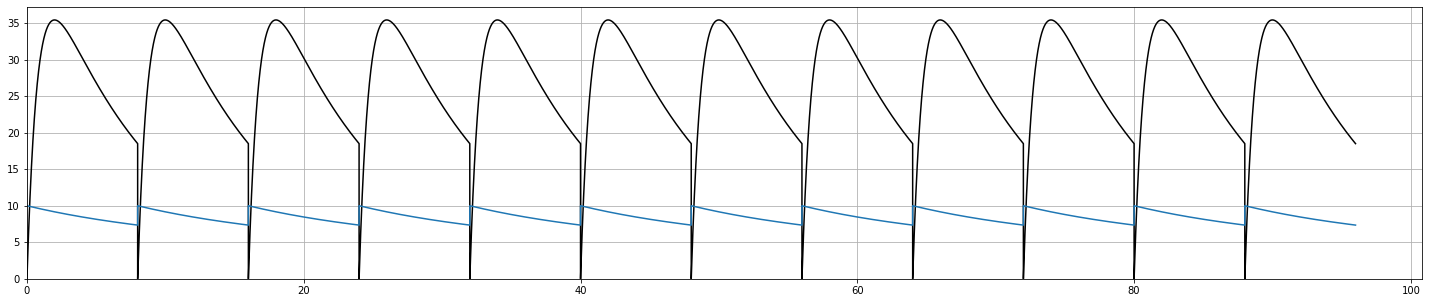

In [669]:
fig, ax = plt.subplots(figsize=(25,5))
plt.plot(tz, xz, 'black')
# plt.plot(tz, yz)
plt.plot(tz, zz)
plt.xlim(0)
plt.ylim(0)
plt.grid(True)